# Исследование данных

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import re
import string
from wordcloud import WordCloud

## Общая информация о данных

In [4]:
with open('data/raw_dataset.txt', 'r', encoding='utf-8') as f:
    texts = [line.strip() for line in f if line.strip()]

print(f"Кол-во текстов: {len(texts)}")
print("Примеры:")
for t in texts[:5]:
    print("-", t[:150])

Кол-во текстов: 1600498
Примеры:
- @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
- is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!
- @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds
- my whole body feels itchy and like its on fire
- @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.


## Длина текстов в символах и словах

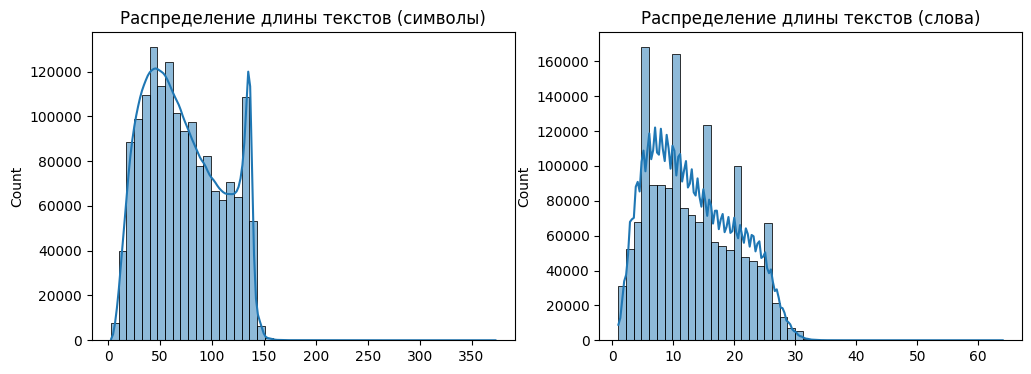

In [6]:
lens_chars = [len(t) for t in texts]
lens_words = [len(t.split()) for t in texts]

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(lens_chars, bins=50, kde=True)
plt.title("Распределение длины текстов (символы)")

plt.subplot(1,2,2)
sns.histplot(lens_words, bins=50, kde=True)
plt.title("Распределение длины текстов (слова)")
plt.show()

## Частотный анализ слов

In [8]:
all_words = " ".join(texts).lower().split()
word_freq = Counter(all_words)

most_common = word_freq.most_common(30)
print(most_common)

[('i', 746786), ('to', 560459), ('the', 518967), ('a', 376549), ('my', 312916), ('and', 295764), ('you', 237803), ('is', 231195), ('for', 214121), ('in', 210018), ('it', 191084), ('of', 182661), ('on', 161632), ('so', 145804), ('have', 143331), ('that', 128797), ('me', 128509), ("i'm", 127639), ('but', 124699), ('just', 124494), ('with', 113536), ('be', 110490), ('at', 110411), ('was', 102774), ('not', 102185), ('this', 88174), ('get', 80961), ('good', 77393), ('are', 76012), ('like', 75440)]


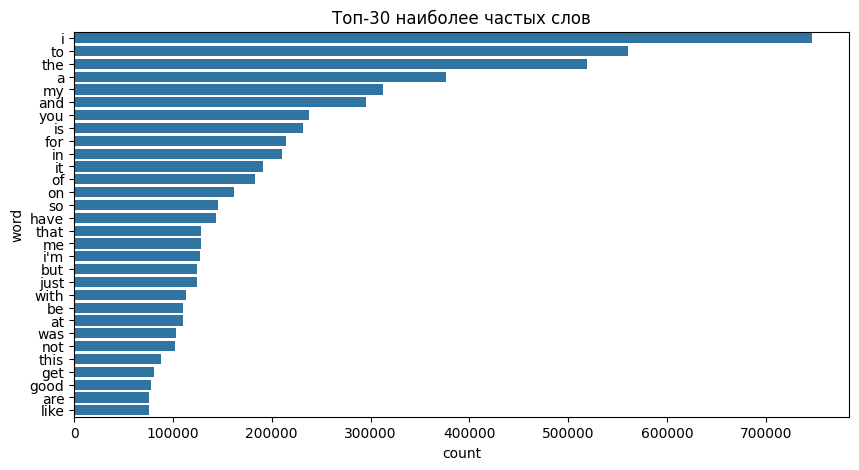

In [10]:
df_freq = pd.DataFrame(most_common, columns=["word", "count"])
plt.figure(figsize=(10,5))
sns.barplot(data=df_freq, x="count", y="word")
plt.title("Топ-30 наиболее частых слов")
plt.show()

## Редкие токены и символы

In [12]:
unique_chars = set("".join(texts))
print("Найденные символы:\n", sorted(unique_chars))

Найденные символы:
 ['\t', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '\x7f', '\x80', '\x82', '\x83', '\x84', '\x85', '\x86', '\x87', '\x88', '\x89', '\x8a', '\x8b', '\x8c', '\x8e', '\x91', '\x92', '\x93', '\x94', '\x95', '\x96', '\x97', '\x98', '\x99', '\x9a', '\x9b', '\x9c', '\x9e', '\x9f', '\xa0', '¡', '¢', '£', '¤', '¥', '¦', '§', '¨', '©', 'ª', '«', '¬', '\xad', '®', '¯', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¸', '¹', 'º', '»', '¼', '½', '¾', '¿', 'Â', 'Ã', 'Ä', 'Å', 'Æ', 'Ç', 'È', 'É', 'Ê', 'Ë', 'Ì', 'Í', 'Î', 'Ï', 'Ð', 'Ñ', 'Ò', 'Ó', '×', 'Ø', 'Ù', 'Ú', 'Û', 'ß

## Уникальные слова

In [13]:
vocab = set(all_words)
print(f"Уникальных слов: {len(vocab)}")

Уникальных слов: 1194041


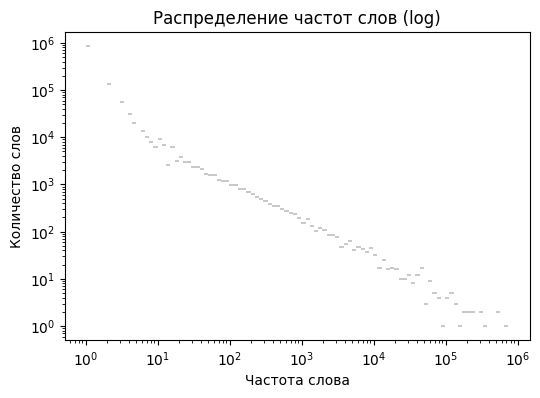

In [15]:
word_counts = list(word_freq.values())
plt.figure(figsize=(6,4))
sns.histplot(word_counts, bins=100, log_scale=(True, True))
plt.title("Распределение частот слов (log)")
plt.xlabel("Частота слова")
plt.ylabel("Количество слов")
plt.show()

## Облако слов

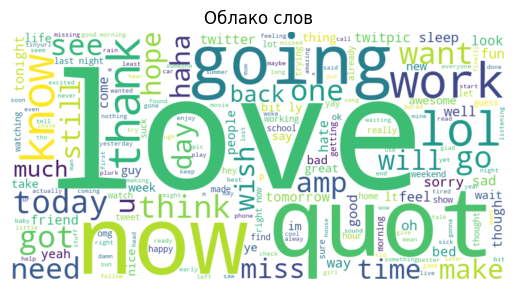

In [18]:
wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_words))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Облако слов")
plt.show()